**STATISTICS - 4**

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [13]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


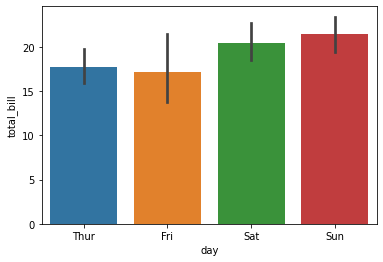

In [10]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

In [15]:
tipsFri = tips[tips["day"] == "Fri"]
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [17]:
xbar = tipsFri.total_bill.mean()
xbar

17.15157894736842

In [21]:
sem = tipsFri.total_bill.sem()  #ortalamanın standart hatası. (standart error of mean)
sem

1.9047607734794163

In [20]:
tipsFri.total_bill.std() / np.sqrt(len(tipsFri))

1.9047607734794163

In [22]:
moe = 1.96 * sem
moe

3.733331116019656

In [23]:
lower = xbar - moe
lower

13.418247831348765

In [24]:
upper = xbar + moe
upper

20.884910063388077

In [25]:
stats.norm.interval(0.95, loc=xbar, scale=sem )

(13.41831643218411, 20.884841462552732)

In [26]:
stats.norm.interval(0.95, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.41831643218411, 20.884841462552732)

In [ ]:
stats.t.interval(0.95, df=len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())  # daha doğru.

In [27]:
tipsSun = tips[tips["day"] == "Sun"]
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
len(tipsSun)

76

In [30]:
stats.t.interval(0.95, df=len(tipsSun)-1, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())

(19.39177370652103, 23.42822629347897)

In [32]:
xbar = tipsSun.total_bill.mean()
xbar

21.41

In [34]:
std = tipsSun.total_bill.std()
std

8.832121828869889

In [35]:
sem = std / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [36]:
moe = 1.96 * sem 
moe

1.9857031567843058